<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Sculpture_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
artist = pd.read_csv("Artist Sculpture Cost.csv")


In [3]:
artist.head(5)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06-07-2015,06-03-2015,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03-06-2017,03-05-2017,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03-09-2015,03-08-2015,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
# So we are predicting the cost(price) a customer might pay to get the painting.

In [5]:
artist.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [6]:
artist = artist.dropna(how = 'any')
artist.shape

(3362, 20)

In [7]:
artist_cost_positive = artist[artist['Cost'] > 0]
artist_cost_positive.shape

(3030, 20)

In [8]:
# As you could see above, there were some costs that were negative, so I have excluded those costs from the dataset.

artist_cost_positive.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,3030.000000,3030.000000,3030.000000,3.030000e+03,3030.000000,3030.000000,3.030000e+03
mean,0.462419,21.938944,9.660396,4.221486e+05,1300.495635,36.939416,1.642879e+04
std,0.266421,11.894853,5.460551,3.099541e+06,10080.916618,26.453719,1.539658e+05
min,0.000000,3.000000,2.000000,4.000000e+00,3.000000,10.000000,8.607000e+01
25%,0.240000,13.000000,6.000000,5.080000e+02,5.260000,16.765000,2.303725e+02
50%,0.450000,21.000000,8.000000,3.007500e+03,7.765000,23.465000,4.583750e+02
75%,0.680000,30.000000,12.000000,3.579700e+04,91.322500,56.630000,1.359648e+03
max,1.000000,73.000000,45.000000,1.179279e+08,382385.670000,99.950000,4.020732e+06


In [9]:
# First converting dates into datetime format in the dataframe.

artist_cost_positive['Scheduled Date'] = pd.to_datetime(artist_cost_positive['Scheduled Date'])
artist_cost_positive['Delivery Date'] = pd.to_datetime(artist_cost_positive['Delivery Date'])

artist_cost_positive.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
650,fffe3800340030003400,George Hartman,0.94,5.0,5.0,62.0,Wood,6.17,23.53,No,Yes,No,Roadways,No,Working Class,No,2018-02-13,2018-02-12,"Lake Debraport, MI 42385",561.98
651,fffe3600360039003000,Vincent Daves,0.64,5.0,5.0,315.0,Brass,5.74,15.91,No,No,No,Roadways,No,Working Class,No,2018-11-28,2018-11-26,"Monicaton, AK 90457",243.11


In [10]:
artist_cost_positive['Delivery Date'].isnull().sum()

0

In [11]:
artist_cost_positive['Scheduled Date'].isnull().sum()

0

In [12]:
# Finding categorical data in the dataset:

artist_cost_positive['Material'].value_counts()

Aluminium    470
Marble       451
Brass        433
Clay         432
Wood         425
Bronze       415
Stone        404
Name: Material, dtype: int64

In [13]:
artist_cost_positive['International'].value_counts()

No     2007
Yes    1023
Name: International, dtype: int64

In [14]:
artist_cost_positive['Express Shipment'].value_counts()

No     2041
Yes     989
Name: Express Shipment, dtype: int64

In [15]:
artist_cost_positive['Installation Included'].value_counts()

No     1799
Yes    1231
Name: Installation Included, dtype: int64

In [16]:
artist_cost_positive['Transport'].value_counts()

Roadways     1239
Airways      1071
Waterways     720
Name: Transport, dtype: int64

In [17]:
artist_cost_positive['Fragile'].value_counts()

No     2547
Yes     483
Name: Fragile, dtype: int64

In [18]:
artist_cost_positive['Customer Information'].value_counts()

Working Class    2211
Wealthy           819
Name: Customer Information, dtype: int64

In [19]:
artist_cost_positive['Remote Location'].value_counts()

No     2442
Yes     588
Name: Remote Location, dtype: int64

In [20]:
# So there are more than 3000 artists in the dataset that we have narrowed down.

artist_cost_positive['Artist Name'].value_counts()

John Brown          3
James Moore         3
Charles Jones       2
Mary Williams       2
Catherine Martin    2
                   ..
Yvonne Hough        1
Peggy Gregory       1
Ron Pigott          1
Keith Hileman       1
Vernon Carroll      1
Name: Artist Name, Length: 3019, dtype: int64

In [21]:
# Converting the categorical datatypes into numerical ones
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [22]:
name_list = ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
            'Customer Information', 'Remote Location']

for name in name_list:
  artist_cost_positive[name] = label_encoded(artist_cost_positive[name])

artist_cost_positive.head(3) 

Material ['Aluminium' 'Brass' 'Bronze' 'Clay' 'Marble' 'Stone' 'Wood']
International ['No' 'Yes']
Express Shipment ['No' 'Yes']
Installation Included ['No' 'Yes']
Transport ['Airways' 'Roadways' 'Waterways']
Fragile ['No' 'Yes']
Customer Information ['Wealthy' 'Working Class']
Remote Location ['No' 'Yes']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
650,fffe3800340030003400,George Hartman,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,"Lake Debraport, MI 42385",561.98
651,fffe3600360039003000,Vincent Daves,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,2018-11-26,"Monicaton, AK 90457",243.11
653,fffe330037003500,Marcia Chevrette,0.74,25.0,18.0,917520.0,4,848.75,52.62,0,1,1,1,0,0,0,2017-12-18,2017-12-18,"South Richard, HI 75014",87760.07


In [23]:
artist_cost_positive.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


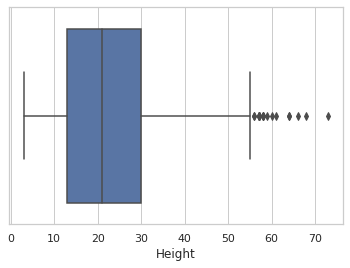

In [25]:
sns.set_theme(style="whitegrid")
sns.boxplot(artist_cost_positive['Height']) # change the column name to see the outliers for all the columns.

In [26]:
artist_cost_positive = artist_cost_positive[artist_cost_positive['Height'] < 53]
artist_cost_positive = artist_cost_positive[artist_cost_positive['Width'] < 22]
artist_cost_positive = artist_cost_positive[artist_cost_positive['Price Of Sculpture'] < 4000]
artist_cost_positive = artist_cost_positive[artist_cost_positive['Cost'] < 25000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


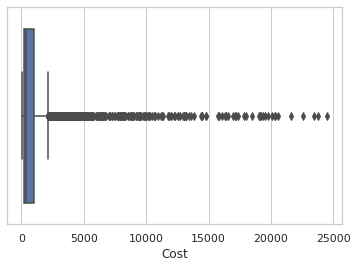

In [27]:
sns.boxplot(artist_cost_positive['Cost'])

In [28]:
artist_cost_positive.shape

(2765, 20)

In [29]:
# Removing columns that are not required:

X = artist_cost_positive.drop(['Customer Id', 'Artist Name', 'Customer Location'], axis = 1)

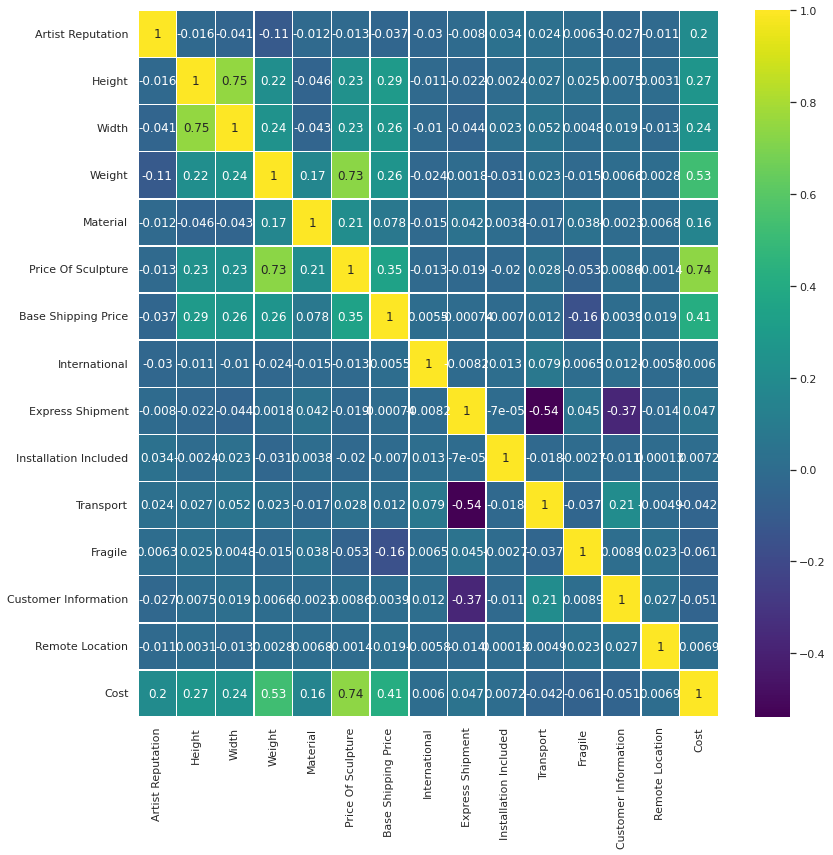

In [30]:
plt.figure(figsize=(13,13))
sns.heatmap(X.corr(),annot=True,cmap='viridis',linewidths=.5)

In [31]:
# Some interesting findings that you can see from the above graph is, first the price of the painting or sculpture is not affected much
# by whom it has been created as you can see the correlation of price(cost) to that of artists reputation is very low.
# Next you can see the base price of the painting or sculpture is very much correlated to the weight, which is bizarre.
# You can try to find other meaning from the correlational graph as well.

In [32]:
X['Waiting time'] = X['Scheduled Date'] - X["Delivery Date"]
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,Waiting time
650,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,561.98,1 days
651,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,2018-11-26,243.11,2 days
662,0.65,22.0,6.0,8737.0,1,22.05,68.33,0,1,1,0,0,1,0,2015-12-15,2015-12-13,1271.89,2 days
664,0.59,26.0,6.0,133987.0,4,409.78,55.05,0,1,0,0,0,0,0,2016-07-24,2016-07-28,3619.57,-4 days
667,0.24,19.0,6.0,170477.0,5,529.95,48.53,0,0,0,0,0,0,1,2016-12-16,2016-12-18,2122.79,-2 days


In [33]:
# Removing the 'days' from the Waiting time data column.

time_list = X['Waiting time'].to_list()
print(str(time_list[0]).split(" ")[0])

1


In [34]:
def extractingSize(item):
  count = 0
  try:
    s = str(item).split(" ")
    return float(s[0])
  except:
    count = count + 1
    pass

X['Waiting time'] = X['Waiting time'].map(extractingSize)

In [35]:
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,Waiting time
650,0.94,5.0,5.0,62.0,6,6.17,23.53,0,1,0,1,0,1,0,2018-02-13,2018-02-12,561.98,1.0
651,0.64,5.0,5.0,315.0,1,5.74,15.91,0,0,0,1,0,1,0,2018-11-28,2018-11-26,243.11,2.0
662,0.65,22.0,6.0,8737.0,1,22.05,68.33,0,1,1,0,0,1,0,2015-12-15,2015-12-13,1271.89,2.0
664,0.59,26.0,6.0,133987.0,4,409.78,55.05,0,1,0,0,0,0,0,2016-07-24,2016-07-28,3619.57,-4.0
667,0.24,19.0,6.0,170477.0,5,529.95,48.53,0,0,0,0,0,0,1,2016-12-16,2016-12-18,2122.79,-2.0


In [36]:
y = X['Cost']
X = X.drop(['Scheduled Date', 'Delivery Date', 'Cost'], axis = 1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [39]:
random_model = RandomForestRegressor(n_estimators=200, n_jobs = -1)

In [40]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

97.62 %


In [41]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

84.65 %
